<a href="https://colab.research.google.com/github/wernenveiga/fundamentos-de-ciencia-de-dados/blob/main/Exame_Pr%C3%A1tico_Se%C3%A7%C3%A3o_3_Testes_de_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
arquivo = '/content/AnimalData.csv'
df_animal = pd.read_csv(arquivo)
df_animal

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,Independent,Intelligent,Loyal,Social,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/2016,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,N,Y,N,N,N,18.0,6.0,Toy,Tan & White,3.30,Heartworm Negative,1/7/2016,Adoption,6
1,K12-000037,1/1/2016,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,N,Y,N,Y,Y,14.0,25.0,Terrier,White & Brown,7.50,No Lab Test,1/3/2016,Return to Owner,2
2,K12-000108,1/1/2016,Stray,Dog,Intact,Male,2,Normal,Pit Bull Mix,N,N,N,Y,N,Y,14.0,90.0,Terrier,Blue & White,74.00,Heartworm Negative,1/13/2016,Humane Euthanasia,12
3,K12-000125,1/1/2016,Stray,Dog,Neutered,Male,0,Normal,Labrador Retr & Border Collie,N,Y,Y,Y,Y,Y,12.0,79.0,Sporting,White & Black,22.00,No Lab Test,1/8/2016,Adoption,7
4,K12-000157,1/1/2016,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,Y,Y,Y,Y,Y,12.0,79.0,Sporting,Black & White,54.00,Heartworm Negative,4/4/2016,Adoption,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,K12-022689,12/23/2016,Stray,Cat,Intact,Male,0,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crm Tabby,1.75,"FeLV Negative, FIV Negative",12/31/2016,Humane Euthanasia,8
469,K12-022743,12/23/2016,Owner Surrender,Cat,Intact,Male,0,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brn Tabby & White,1.75,"FeLV Negative, FIV Negative",1/4/13,Transfer,12
470,K12-022814,12/23/2016,Owner Surrender,Dog,Neutered,Male,4,Injured or Sick,Bruss Griffon Mix,N,N,Y,Y,N,Y,15.0,10.0,Toy,Brown,10.50,No Lab Test,12/29/2016,Humane Euthanasia,6
471,K12-022885,12/30/2016,Stray,Dog,Intact,Male,2,Normal,Poodle Min Mix,N,N,Y,Y,N,Y,14.0,9.0,Toy,White,13.50,Heartworm Negative,1/4/13,Return to Owner,5


## Pergunta 1:
Um pesquisador quer verificar se cães inteligentes são mais leais. A hipótese alternativa diz que sim. A hipótese nula diz que não há relação entre inteligência e lealdade de cães. Para verificar essa hipótese, use um Teste Chi Quadrado adotando uma probabilidade de 95%. Marque a opção mais correta.

In [10]:
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [5]:
df_animal.columns

Index(['Impound.No', 'Intake.Date', 'Intake.Type', 'Animal.Type',
       'Neutered.Status', 'Sex', 'Age.Intake', 'Condition', 'Breed',
       'Aggressive', 'Independent', 'Intelligent', 'Loyal', 'Social',
       'Good.with.Kids', 'Max.Life.Expectancy', 'Max.Weight', 'Dog.Group',
       'Color', 'Weight', 'Lab.Test', 'Outcome.Date', 'Outcome.Type',
       'Days.Shelter'],
      dtype='object')

In [22]:
is_dog = df_animal['Animal.Type'] == 'Dog'
is_dog

0       True
1       True
2       True
3       True
4       True
       ...  
468    False
469    False
470     True
471     True
472     True
Name: Animal.Type, Length: 473, dtype: bool

In [24]:
df_dog = df_animal[is_dog]
df_dog

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,Independent,Intelligent,Loyal,Social,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/2016,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,N,Y,N,N,N,18.0,6.0,Toy,Tan & White,3.30,Heartworm Negative,1/7/2016,Adoption,6
1,K12-000037,1/1/2016,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,N,Y,N,Y,Y,14.0,25.0,Terrier,White & Brown,7.50,No Lab Test,1/3/2016,Return to Owner,2
2,K12-000108,1/1/2016,Stray,Dog,Intact,Male,2,Normal,Pit Bull Mix,N,N,N,Y,N,Y,14.0,90.0,Terrier,Blue & White,74.00,Heartworm Negative,1/13/2016,Humane Euthanasia,12
3,K12-000125,1/1/2016,Stray,Dog,Neutered,Male,0,Normal,Labrador Retr & Border Collie,N,Y,Y,Y,Y,Y,12.0,79.0,Sporting,White & Black,22.00,No Lab Test,1/8/2016,Adoption,7
4,K12-000157,1/1/2016,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,Y,Y,Y,Y,Y,12.0,79.0,Sporting,Black & White,54.00,Heartworm Negative,4/4/2016,Adoption,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,K12-022595,12/23/2016,Stray,Dog,Neutered,Male,0,Normal,Norfolk Terrier Mix,Y,Y,N,N,N,Y,15.0,11.0,Terrier,Cream & White,7.50,No Lab Test,12/31/2016,Adoption,8
466,K12-022596,12/23/2016,Owner Surrender,Dog,Intact,Female,1,Injured or Sick,Shih Tzu Mix,N,N,N,N,N,Y,16.0,16.0,Non-Sporting,White & Black,5.75,No Lab Test,12/24/2016,Transfer,1
470,K12-022814,12/23/2016,Owner Surrender,Dog,Neutered,Male,4,Injured or Sick,Bruss Griffon Mix,N,N,Y,Y,N,Y,15.0,10.0,Toy,Brown,10.50,No Lab Test,12/29/2016,Humane Euthanasia,6
471,K12-022885,12/30/2016,Stray,Dog,Intact,Male,2,Normal,Poodle Min Mix,N,N,Y,Y,N,Y,14.0,9.0,Toy,White,13.50,Heartworm Negative,1/4/13,Return to Owner,5


In [33]:
df_dog_inteligente_lealdade = df_dog[['Animal.Type', 'Intelligent', 'Loyal']]
df_dog_inteligente_lealdade

,Animal.Type,Intelligent,Loyal
0,Dog,Y,N
1,Dog,Y,N
2,Dog,N,Y
3,Dog,Y,Y
4,Dog,Y,Y
...,...,...,...
465,Dog,N,N
466,Dog,N,N
470,Dog,Y,Y
471,Dog,Y,Y


In [34]:
scipy.stats.chisquare(df_dog_inteligente_lealdade['Intelligent'].value_counts())

Power_divergenceResult(statistic=12.786941580756015, pvalue=0.0003490473054141802)

In [35]:
scipy.stats.chisquare(df_dog_inteligente_lealdade['Loyal'].value_counts())

Power_divergenceResult(statistic=20.374570446735394, pvalue=6.367027957629322e-06)

In [36]:
freq_table = pd.crosstab(df_dog_inteligente_lealdade['Intelligent'], df_dog_inteligente_lealdade['Loyal'])
freq_table

Loyal,N,Y
Intelligent,,
N,34,81
Y,73,103


In [37]:
chi2stat, p_value, dof, freq_experada = chi2_contingency(freq_table)
print(chi2stat)
print(p_value)
print(dof)
print(freq_experada)

3.74808139071793
0.05286816307944323
1
[[ 42.28522337  72.71477663]
 [ 64.71477663 111.28522337]]


In [38]:
prob = 0.95
valor_crit = chi2.ppf(prob, dof)
valor_crit

3.841458820694124

In [106]:
if abs(chi2stat) >= valor_crit:
  print("há relação entre inteligência e lealdade de cães (Rejeita-se H0")
else:
  print("não há relação entre inteligência e lealdade de cães (Aceita-se H0)")
  

não há relação entre inteligência e lealdade de cães (Aceita-se H0)


##Pergunta 2:
Um pesquisador tem uma hipótese alternativa H1 de que gatos tendem a permanecer mais tempo no abrigo do que cães. Sabendo que a distribuição não é normal e o valor de alfa é de 0.05, calcule o valor crítico aproximado.

In [40]:
from scipy.stats import t
from scipy.stats import ttest_ind

In [43]:
df_animal['Days.Shelter'].describe()

count    473.000000
mean      20.799154
std       30.116297
min        0.000000
25%        6.000000
50%        9.000000
75%       20.000000
max      211.000000
Name: Days.Shelter, dtype: float64

In [44]:
is_cat = df_animal['Animal.Type'] == 'Cat'
is_cat

0      False
1      False
2      False
3      False
4      False
       ...  
468     True
469     True
470    False
471    False
472    False
Name: Animal.Type, Length: 473, dtype: bool

In [45]:
df_cat = df_animal[is_cat]
df_cat

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,Independent,Intelligent,Loyal,Social,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
13,K12-000642,1/15/2016,Owner Surrender,Cat,Spayed,Female,15,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,9.80,"FeLV Negative, FIV Negative",1/24/2016,Adoption,9
14,K12-000653,1/15/2016,Stray,Cat,Neutered,Male,4,Normal,Maine Coon Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blue,13.00,"FeLV Negative, FIV Positive",1/26/2016,Return to Owner,11
16,K12-000798,1/15/2016,Owner Surrender,Cat,Spayed,Female,4,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tortie,9.00,"FeLV Negative, FIV Negative",3/30/2016,Transfer,75
18,K12-000893,1/15/2016,Owner Surrender,Cat,Spayed,Female,2,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brn Tabby,10.50,"FeLV Negative, FIV Positive",2/2016/2016,Adoption,28
19,K12-000903,1/15/2016,Stray,Cat,Neutered,Male,0,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,4.50,"FeLV Negative, FIV Positive",2/2016/2016,Adoption,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,K12-022168,12/9/2016,Stray,Cat,Spayed,Female,0,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White & Blue,4.00,"FeLV Negative, FIV Negative",12/21/2016,Adoption,12
461,K12-022529,12/16/2016,Stray,Cat,Spayed,Female,0,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,3.25,No Lab Test,12/26/2016,Transfer,10
467,K12-022688,12/23/2016,Stray,Cat,Neutered,Male,0,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blue,4.00,No Lab Test,1/2/13,Transfer,10
468,K12-022689,12/23/2016,Stray,Cat,Intact,Male,0,Normal,Domestic Sh Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crm Tabby,1.75,"FeLV Negative, FIV Negative",12/31/2016,Humane Euthanasia,8


In [49]:
tempo_abrigo_cat = df_cat['Days.Shelter']
tempo_abrigo_cat.describe()

count    182.000000
mean      29.148352
std       37.596946
min        0.000000
25%        7.000000
50%       12.000000
75%       39.250000
max      201.000000
Name: Days.Shelter, dtype: float64

In [50]:
tempo_abrigo_dog = df_dog['Days.Shelter']
tempo_abrigo_dog.describe()

count    291.000000
mean      15.577320
std       22.866103
min        0.000000
25%        6.000000
50%        8.000000
75%       14.000000
max      211.000000
Name: Days.Shelter, dtype: float64

In [62]:
t_stat, p_valuet = ttest_ind(tempo_abrigo_cat, tempo_abrigo_dog)
print(t_stat, p_value)
print("t = %.3f, p = %.6f" % (t_stat, p_value))

4.882282023270548 1.4384631263704528e-06
t = 4.882, p = 0.000001


In [53]:
count_abrigo_cat, count_abrigo_dog = len(tempo_abrigo_cat), len(tempo_abrigo_dog)
dof = count_abrigo_cat + count_abrigo_dog - 2
dof

471

In [54]:
alpha = 0.05 #95% de confiabilidade
valor_critico = t.ppf(1.0 - alpha, dof)
valor_critico

1.6480952169213052

In [117]:
if abs(t_stat) <= valor_crit:
  print('Os gatos passam mais tempo em abrigo do que os cães (Rejeita-se H0)')
else:
  print('Os gatos não passam mais tempo em abrigo do que os cães (Aceita-se H0)')

Os gatos não passam mais tempo em abrigo do que os cães (Aceita-se H0)


In [116]:
if p_valuet < alpha:
  print('Os gatos passam mais tempo em abrigo do que os cães (Rejeita-se H0)')
else:
  print('Os gatos não passam mais tempo em abrigo do que os cães (Aceita-se H0)')

Os gatos passam mais tempo em abrigo do que os cães (Rejeita-se H0)


##Pergunta 3:
Existem dois tipos de animais no abrigo descrito pelo data frame AnimalData: cães (Dog) e gatos (Cat). Qual é a média aproximada de tempo em que esses animais ficam no abrigo, respectivamente?

In [114]:
df_cat['Days.Shelter'].mean()

29.14835164835165

In [115]:
df_dog['Days.Shelter'].mean()

15.577319587628866

##Pergunta 4:
Um pesquisador deseja testar se o tipo de animal (Cão vs Gato) influencia no tempo em que o animal fica no abrigo e para isso decide usar um teste Anova (One Way F-Test). A hipótese nula diz que não há diferença. A hipótese alternativa diz que gatos tendem a demorar mais tempo no abrigo. Assumindo alfa como 0.05, marque a opção mais correta.

In [65]:
df_anova = df_animal[['Animal.Type', 'Days.Shelter']]
df_anova

,Animal.Type,Days.Shelter
0,Dog,6
1,Dog,2
2,Dog,12
3,Dog,7
4,Dog,94
...,...,...
468,Cat,8
469,Cat,12
470,Dog,6
471,Dog,5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


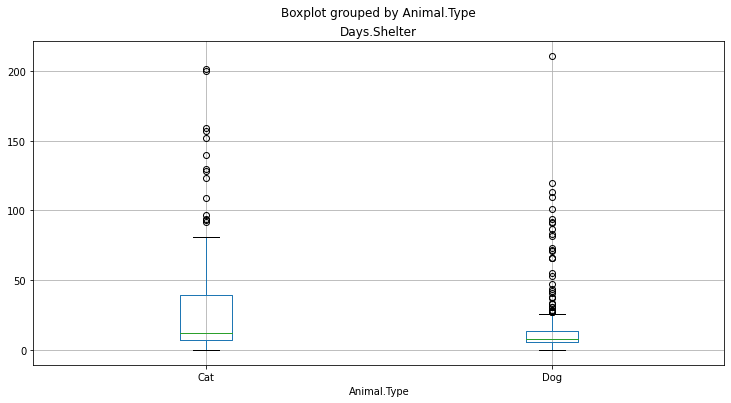

In [66]:
df_anova.boxplot('Days.Shelter', by='Animal.Type', figsize=(12, 6))

In [69]:
tipos_animais = pd.unique(df_anova['Animal.Type'].values)
tipos_animais

array(['Dog', 'Cat'], dtype=object)

In [72]:
testef1_df = {tpa: df_anova['Days.Shelter'][df_anova['Animal.Type'] == tpa] for tpa in tipos_animais}
testef1_df

{'Cat': 13      9
 14     11
 16     75
 18     28
 19     28
        ..
 451    12
 461    10
 467    10
 468     8
 469    12
 Name: Days.Shelter, Length: 182, dtype: int64, 'Dog': 0       6
 1       2
 2      12
 3       7
 4      94
        ..
 465     8
 466     1
 470     6
 471     5
 472     5
 Name: Days.Shelter, Length: 291, dtype: int64}

In [109]:
F_stats, p_valuef = stats.f_oneway(testef1_df['Cat'], testef1_df['Dog'])
print('F: ', F_stats)
print('P: ', p_valuef)

F:  23.836677754750752
P:  1.4384631263705684e-06


In [112]:
if p_valuef > 0.05:
  print(' há diferença, Os gatos passam mais tempo em abrigo do que os cães (Rejeita-se H0)')
else:
  print('não há diferença, Os gatos não passam mais tempo em abrigo do que os cães (Aceita-se H0)')

não há diferença, Os gatos não passam mais tempo em abrigo do que os cães (Aceita-se H0)


##Pergunta 5:
Crie um teste Chi Quadrado que analise as frequências de cães leais com cães inteligentes. Calcule o valor de Chi Quadrado e marque a opção mais correta quanto a este valor.

##Execute os cálculos necessários e marque as alternativas verdadeiras em relação ao tempo em que os animais ficam no abrigo.


In [90]:
import matplotlib.pyplot as plt
import numpy as np

In [86]:
tempo_abrigo = df_animal['Days.Shelter']
tempo_abrigo.describe()

count    473.000000
mean      20.799154
std       30.116297
min        0.000000
25%        6.000000
50%        9.000000
75%       20.000000
max      211.000000
Name: Days.Shelter, dtype: float64

In [88]:
media_tempo = tempo_abrigo.mean()
desvio = tempo_abrigo.std()
tempo_min = tempo_abrigo.min()
tempo_max = tempo_abrigo.max()
n_tempo = tempo_abrigo.count()

In [89]:
dist_tempo = stats.norm(media_tempo, desvio)
dist_tempo

In [91]:
x = np.linspace(tempo_min, tempo_max, n_tempo)
y = dist_tempo.pdf(x)

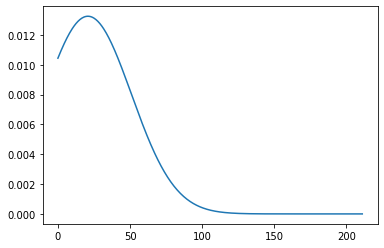

In [92]:
plt.plot(x, y)

In [93]:
tempo_abrigo.skew(axis=0, skipna=True)

3.149775833623174

In [94]:
tempo_abrigo.kurtosis(axis=0, skipna=True)

11.904234877822784

##Pergunta 11:
Um pesquisador tem uma hipótese alternativa H1 de que gatos tendem a permanecer mais tempo no abrigo. Assumindo que a distribuição é normal, calcule através de um teste Z a probabilidade de que gatos fiquem de fato mais tempo no abrigo do que a média de todos os animais e marque a opção mais correta.

In [98]:
media_tempo_cat = tempo_abrigo_cat.mean()
media_tempo_cat

29.14835164835165

In [99]:
#calcular o Z
z_value = (media_tempo_cat - media_tempo)/desvio
z_value

0.2772318677578058

In [100]:
stats.norm.cdf(z_value)
(1 - stats.norm.cdf(z_value))*100

39.080103565592715